# Машинное обучение
## Лабораторная работа №3

Выполнил студент группы 15-В-2   
Разумовский С.А.  
Вариант №11

In [54]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
**Данные описывают потребление электричества в вт\ч при разных погодных условиях, что должно быть предсказано с точки зрения 2-х многозначных дискретных и 26-и вещественных атрибутов**

| Переменная   | Описание  | Параметр  | 
|--------------|--------------|-------------------|
|date| год-месяц-день часы:минуты:секунды |дата|
|Appliances| использование энергии в вт\ч|дискретный|
|lights| использование энергии в светильниках в вт\ч|дискретный|
|T1| температура на кухне в градусах Цельсия|вещественный|
|RH_1| влажность на кухне в %|вещественный|
|T2| температура в гостинной в градусах Цельсия|вещественный|
|RH_2| влажность в гостинной в %|вещественный|
|T3| температура в прачечной в градусах Цельсия|вещественный|
|RH_3| влажность в прачечной в %|вещественный|
|T4| температура в офисе в градусах Цельсия|вещественный|
|RH_4| влажность в офисе в %|вещественный|
|T5| температура в ванной в градусах Цельсия|вещественный|
|RH_5| влажность в ванной в %|вещественный|
|T6| температура снаружи(северная сторона) в градусах Цельсия|вещественный|
|RH_6| влажность снаружи(северная сторона) в %|вещественный|
|T7| температура в гладильной комнате в градусах Цельсия|вещественный|
|RH_7| влажность в гладильной комнате в %|вещественный|
|T8| температура в детской комнате 2 в градусах Цельсия|вещественный|
|RH_8| влажность в детской комнате 2 в %|вещественный|
|T9| температура в комнате родителей в градусах Цельсия|вещественный|
|RH_9| влажность в комнате родителей в %|вещественный|
|T_out| температура снаружи в градусах Цельсия|вещественный|
|Press_mm_hg| давление в mm Hg|вещественный|
|RH_out| влажность снаружи в %|вещественный|
|Windspeed| скорость ветра в m/s|вещественный|
|Visibility| видимость в km|вещественный|
|Tdewpoint| температура на станции в °C|вещественный|
|rv1| случайная переменная 1|вещественный|
|rv2| случайная переменная 2|вещественный|
Уберём столбцы data time, rv1, rv2, так как они не пригодятся в решении задачи регрессии

In [55]:
df = pd.read_csv('energydata_complete.csv')
df.drop(['date', 'rv1', 'rv2'], axis=1, inplace=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [56]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (19735, 26)


Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
dtype: int64

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [57]:
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size:  (19735, 26)


### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [58]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
categorial:  []


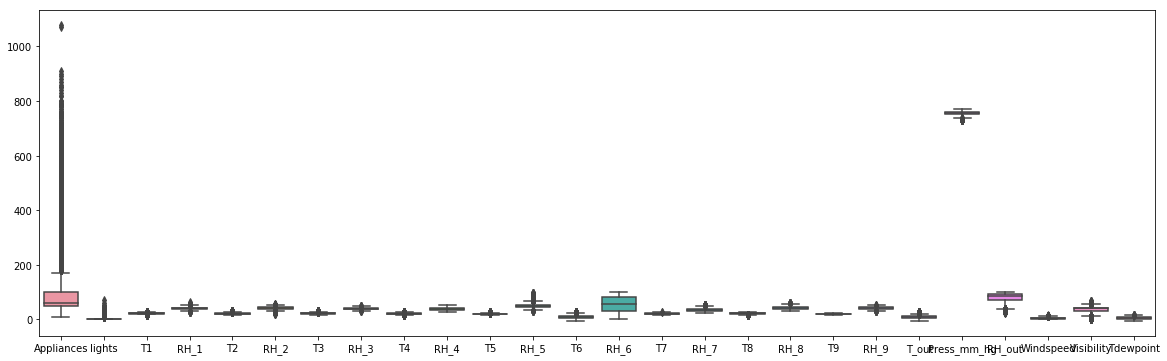

In [59]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

In [60]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362


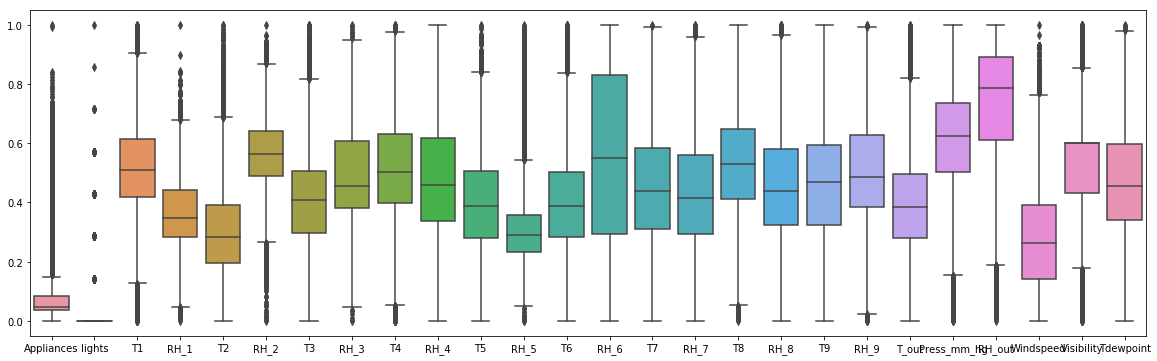

In [61]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены
категориальных признаков нет

### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

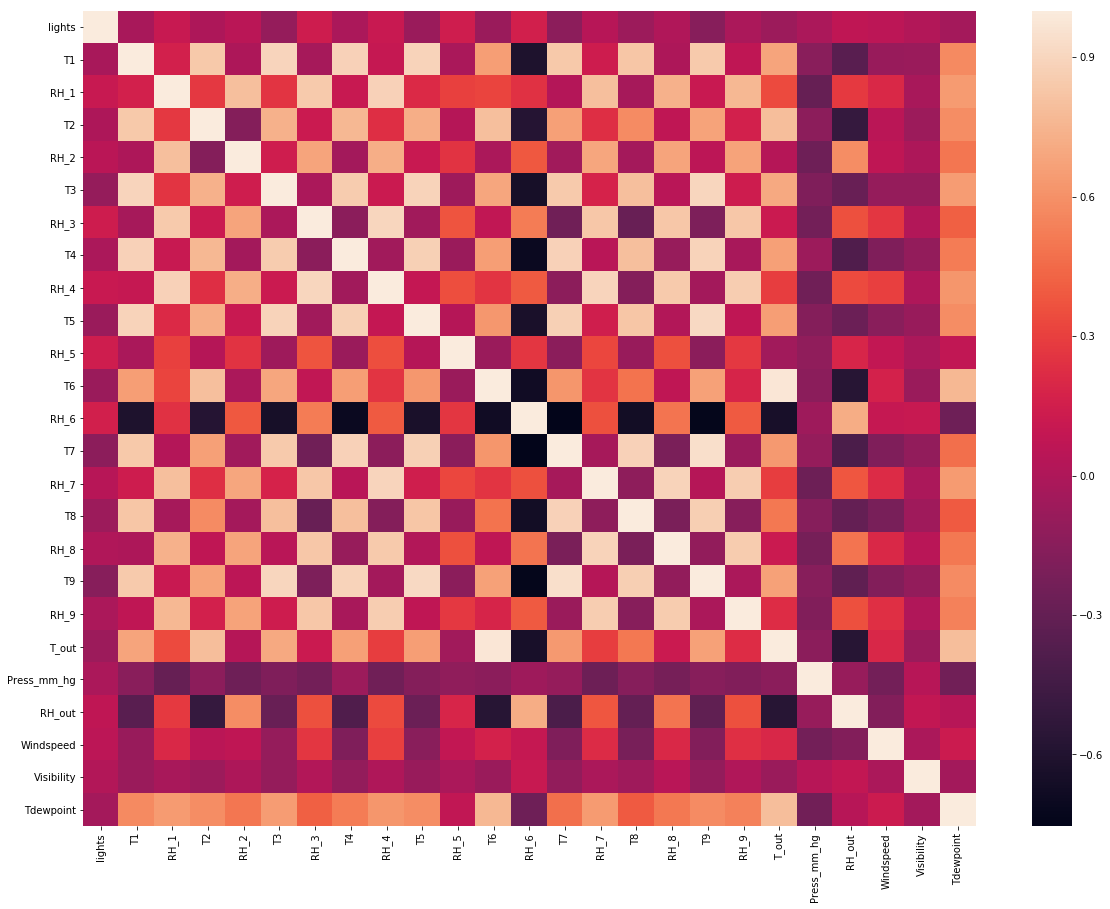

In [62]:
df_corr = df.drop('Appliances', axis=1).corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr)
plt.show()

In [63]:
df_corr

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
lights,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322
T1,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
RH_1,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T2,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
RH_2,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T3,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
RH_3,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T4,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
RH_4,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509
T5,-0.078745,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362


### 6.	Заполните пропущенные значения в данных

In [64]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (19735, 26)


Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
dtype: int64

### 7.	Решите поставленную задачу регрессии в соответствии с заданием. 
 * Линейная регрессия без использования регуляризаторов
 * Линейная регрессия, RIDGE регуляризатор

In [65]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop('Appliances', axis=1), df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Линейная регрессия без использования регуляризаторов

In [66]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

8980     0.003835
2754     0.159704
9132    -0.003312
14359    0.063608
8875    -0.033926
10239    0.068909
8348    -0.026601
15847    0.097880
13166    0.032473
7801     0.069437
451      0.050118
12350    0.038235
4614     0.048989
7221     0.007784
11384    0.002603
Name: Appliances, dtype: float64


In [67]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.409642805319
spearmen correlation:  0.526327320706


Линейная регрессия, RIDGE регуляризатор

In [68]:
import warnings
warnings.filterwarnings("ignore")

regr = linear_model.Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
regr_grid = GridSearchCV(regr, params)
regr_grid.fit(X_train, y_train)
best_alpha = regr_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.1


In [69]:
regr = linear_model.Ridge(alpha=best_alpha)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

8980     0.003818
2754     0.158775
9132    -0.003180
14359    0.064006
8875    -0.033761
10239    0.067997
8348    -0.026584
15847    0.097943
13166    0.032479
7801     0.069310
451      0.049794
12350    0.038203
4614     0.048309
7221     0.007909
11384    0.002319
Name: Appliances, dtype: float64


In [70]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.409542969103
spearmen correlation:  0.526971170106
